<a href="https://colab.research.google.com/github/MAY2704/ML_usecases/blob/main/DS_save_kgraph_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 64.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Entities found by spaCy:
NBX Bank Data Security ORG
NBX Bank ORG
third ORDINAL
NBX Bank ORG
1 CARDINAL
NBX Bank ORG
Belgium GPE
Europe LOC
the General Data Protection 
Regulation ORG
NBX Bank's ORG
GDPR ORG
2 CARDINAL
Data Security ORG
NBX Bank : 
 
• Confidentiality: Ensuring ORG
Fairness ORG
3 CARDINAL
NBX Bank's ORG
NBX Bank ORG
the General Data Protection Regulation ORG
GDPR ORG
GDPR ORG
GDPR ORG
4 CARDINAL
PII ORG
Financial Banking and Insurance ORG
NBX Bank ORG
PII ORG
GDPR ORG
PII ORG
NBX Bank ORG
Belgian NORP
BIC ORG
PAN ORG
CVV ORG
CVC ORG
MAC ORG
Usernames PERSON
Digital Signatures and Certificates ORG
GDPR ORG
NBX Bank ORG
5 CARDINAL
NBX Bank ORG
third ORDINAL
GDPR ORG
6 CARDINAL
Policy Review ORG
at least annually DATE
NBX Bank's ORG


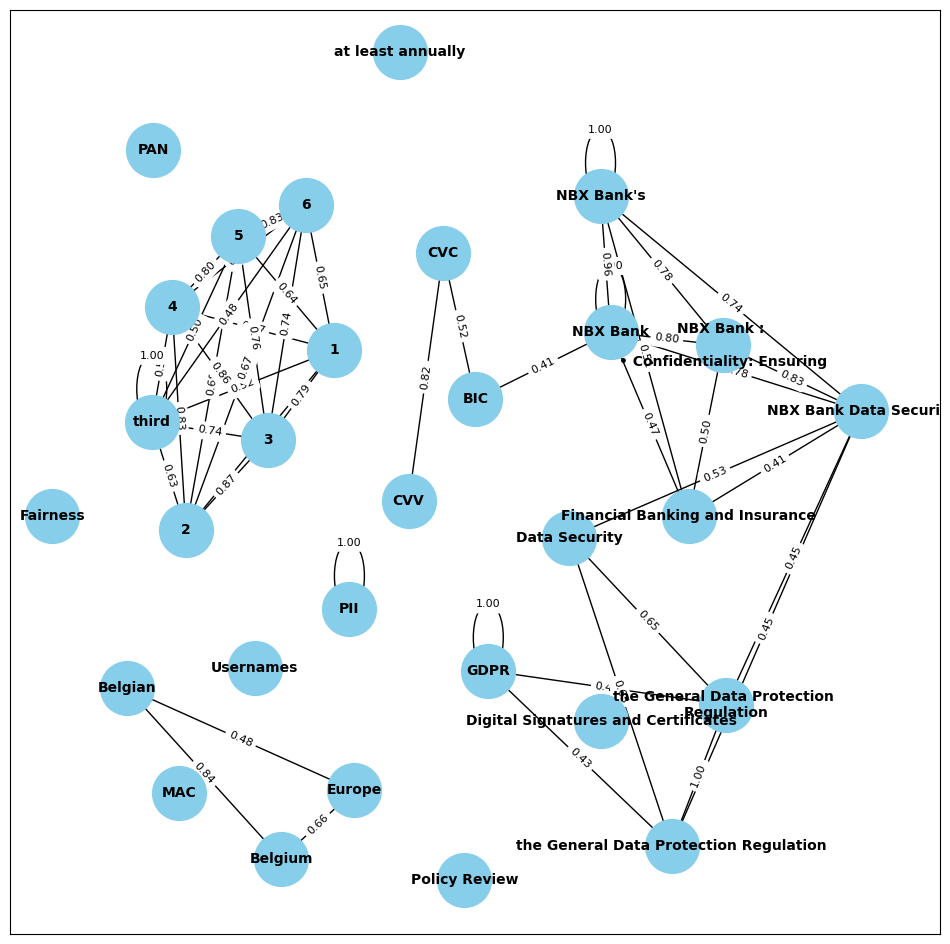

Knowledge graph stored at: /content/drive/MyDrive/output/knowledge_graph_gdpr.json


/usr/local/lib/python3.11/dist-packages/networkx/readwrite/json_graph/node_link.py:142: FutureWarning: 
The default value will be `edges="edges" in NetworkX 3.6.

To make this warning go away, explicitly set the edges kwarg, e.g.:

  nx.node_link_data(G, edges="links") to preserve current behavior, or
  nx.node_link_data(G, edges="edges") for forward compatibility.
  warnings.warn(


In [ ]:
!pip install PyPDF2 spacy networkx matplotlib sentence-transformers transformers torch accelerate huggingface_hub

import PyPDF2
import spacy
import networkx as nx
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer, util
import torch
import os
import json  # Import json for storing the graph
from google.colab import drive
from huggingface_hub import HfFolder, whoami

# Mount Google Drive
drive.mount('/content/drive')

# Hugging Face login using Colab secrets.
token = os.environ.get("HF_TOKEN")
if token:
    HfFolder.save_token(token)
    try:
        user_info = whoami()
        print(f"Logged in as: {user_info['name']}")
    except Exception as e:
        print(f"Login failed: {e}")
else:
    print("HF_TOKEN not found in environment variables")

# Download spaCy model
!python -m spacy download en_core_web_lg

# Load spaCy model
nlp = spacy.load("en_core_web_lg")

# Load sentence transformer model
model_name = 'sentence-transformers/all-MiniLM-L6-v2'
transformer_model = SentenceTransformer(model_name)

def extract_text_from_pdf(pdf_path):
    """Extracts text from a PDF file."""
    text = ""
    try:
        with open(pdf_path, 'rb') as file:
            pdf_reader = PyPDF2.PdfReader(file)
            for page_num in range(len(pdf_reader.pages)):
                page = pdf_reader.pages[page_num]
                text += page.extract_text()
    except Exception as e:
        print(f"Error extracting text: {e}")
    return text

def create_knowledge_graph(text):
    """Creates a knowledge graph from the extracted text."""
    doc = nlp(text)

    print("Entities found by spaCy:")
    for ent in doc.ents:
        print(ent.text, ent.label_)

    graph = nx.Graph()
    entities = [(ent.text, ent.label_) for ent in doc.ents]

    if len(entities) >= 2:
        for i in range(len(entities)):
            for j in range(i + 1, len(entities)):
                entity1, label1 = entities[i]
                entity2, label2 = entities[j]

                 embedding1 = transformer_model.encode(entity1, convert_to_tensor=True)
                embedding2 = transformer_model.encode(entity2, convert_to_tensor=True)
                similarity = util.pytorch_cos_sim(embedding1, embedding2).item()

                graph.add_node(entity1, label=label1)
                graph.add_node(entity2, label=label2)
                graph.add_edge(entity1, entity2, weight=similarity)
    return graph

def visualize_knowledge_graph(graph, similarity_threshold=0.4):
    """Visualizes the knowledge graph with edge filtering."""
    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(graph, k=0.3)

    nx.draw_networkx_nodes(graph, pos, node_size=1500, node_color='skyblue')

    edges = [(u, v) for u, v, d in graph.edges(data=True) if d['weight'] >= similarity_threshold]
    nx.draw_networkx_edges(graph, pos, edgelist=edges)

    nx.draw_networkx_labels(graph, pos, font_size=10, font_weight='bold')

    edge_labels = {(u, v): f"{graph[u][v]['weight']:.2f}" for u, v, d in graph.edges(data=True) if d['weight'] >= similarity_threshold}
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=8)

    plt.show()

def store_knowledge_graph(graph, filepath):
    """Stores the knowledge graph as a JSON file."""
    graph_data = nx.node_link_data(graph)
    with open(filepath, 'w') as f:
        json.dump(graph_data, f, indent=4)
    print(f"Knowledge graph stored at: {filepath}")

# Example usage:
pdf_file_name = "NBX_Bank_Data_Security_Policies.pdf"
pdf_path = os.path.join('/content/drive/MyDrive/project', pdf_file_name)
output_graph_path = os.path.join('/content/drive/MyDrive/output', "knowledge_graph_gdpr.json")  # Specify output path

if os.path.exists(pdf_path):
    extracted_text = extract_text_from_pdf(pdf_path)
    if extracted_text:
        knowledge_graph = create_knowledge_graph(extracted_text)
        visualize_knowledge_graph(knowledge_graph)
        store_knowledge_graph(knowledge_graph, output_graph_path) #Store the graph.
else:
    print(f"File not found: {pdf_path}")